In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# first reading datasets
### from sklearn we normalize our data
Because our datasets is timesSeries then we have to change shape our data and we need label for RNN and LSTM algoritms
Then we slice our dataset for 50 dataset and one label and changing shape from (1258,) to  (1208, 50) and y label to (1208,) shapes. then according to the RNN we change the shape of training dataset to (1208,50,1) and we give it to RNN algoritms

In [58]:
dataset_train = pd.read_csv('Stock_Price_Train.csv')

In [59]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [60]:
train = dataset_train.loc[:,['Open']].values
train


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
trained_scaled = scaler.fit_transform(train)

trained_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

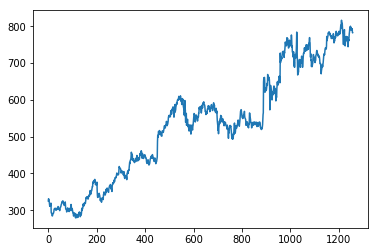

In [62]:
plt.plot(train)
plt.show()

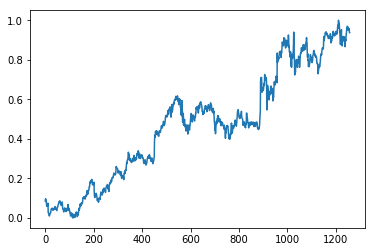

1258

In [63]:
plt.plot(trained_scaled)
plt.show()
len(trained_scaled)

In [64]:
X_train = []
y_train = []
times_step = 50

for i in range(times_step ,1258):
    
    X_train.append(trained_scaled[i-times_step:i,0])
    y_train.append(trained_scaled[i,0]) 
    
    
X_train ,y_train = np.array(X_train),np.array(y_train)
    
print(X_train.shape)
print(y_train.shape)

(1208, 50)
(1208,)


In [69]:
X_train = np.reshape(X_train ,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1208, 50, 1)

In [66]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [68]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Epoch 1/100
1208/1208 [==============================] - 2s 2ms/step - loss: 0.4136
Epoch 2/100
1208/1208 [==============================] - 1s 920us/step - loss: 0.2555
Epoch 3/100
1208/1208 [==============================] - 1s 924us/step - loss: 0.2017
Epoch 4/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.1463
Epoch 5/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.1280
Epoch 6/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0973
Epoch 7/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0860
Epoch 8/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0701
Epoch 9/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0607
Epoch 10/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0561
Epoch 11/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0483
Epoch 12/100
1208/1208 [==============================] - 1s 1ms/step 

1208/1208 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 97/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 98/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 99/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0025
Epoch 100/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0019


In [96]:
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()
len(dataset_test)

20

In [97]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
len(real_stock_price)

20

In [83]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis =0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-times_step:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [90]:
real_stock_price.shape
real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0],real_stock_price.shape[1],1))

In [98]:
real_stock_price.shape

(20, 1)

In [94]:
print(inputs.shape)
inputs

(70, 1)


array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [ ]:
X_test = []

for i in range(0,20):
    X_test.append(real_stock_price[i-times_step:i,0])
    
X_test = np.array(X_test)
print(len(X_test))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue',label = 'Predicted Google Stock Price')
plt.title:('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

20
(20, 50, 1)


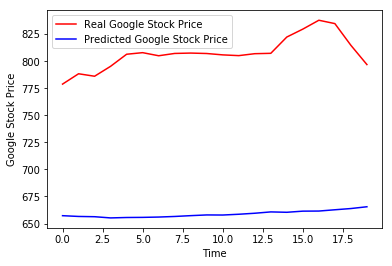

In [88]:
X_test = []

for i in range(times_step,70):
    X_test.append(inputs[i-times_step:i,0])
    
X_test = np.array(X_test)
print(len(X_test))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue',label = 'Predicted Google Stock Price')
plt.title:('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [95]:
X_test

array([[[0.97510976],
        [0.95966962],
        [0.97808617],
        [1.        ],
        [0.98076494],
        [0.97083116],
        [0.98450406],
        [0.96054394],
        [0.9371419 ],
        [0.92841729],
        [0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0.94114145],
        [0.95762334],
        [0.96413424],
        [0.96402262],
        [0.96971501],
        [0.95077759],
        [0.96294367],
        [0.96123223],
        [0.95475854],
        [0

In [215]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [216]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5 )
data.tail(10)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


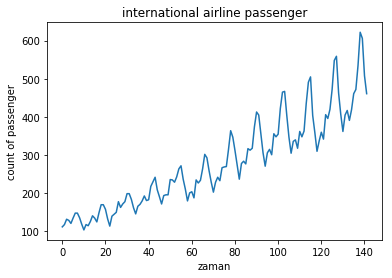

In [217]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('zaman')
plt.title("international airline passenger")
plt.ylabel('count of passenger')
plt.show()

In [218]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [219]:
# normalization 
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)


In [220]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))
print(train.shape)
print(test.shape)

train size: 71, test size: 71 
(71, 1)
(71, 1)


In [221]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  
print(trainX.shape)
print(trainY.shape)

(60, 10)
(60,)


In [222]:
time_stepm = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(train[i+time_stemp,0])
    
testX = numpy.array(dataX)
testY = numpy.array(dataY)
print(testX.shape)
print(testY.shape)


(60, 10)
(60,)


In [223]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(testX.shape)
print(testY.shape)

(60, 1, 10)
(60,)


In [224]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0108
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 13/50
60/60 [=============================

In [225]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 16.76 RMSE
Test Score: 16.76 RMSE


In [226]:
trainY[0]

array([103.99999952, 117.99999916, 115.00000199, 125.99999674,
       140.99999801, 135.00000368, 125.00000283, 148.9999956 ,
       169.99999891, 169.99999891, 157.99999481, 133.00000042,
       114.00000036, 139.99999638, 145.00000452, 149.99999723,
       177.9999965 , 163.00000295, 172.00000217, 177.9999965 ,
       198.99999982, 198.99999982, 184.00000627, 162.00000133,
       146.00000615, 165.9999924 , 171.00000054, 179.99999976,
       193.00000549, 181.00000139, 183.00000464, 217.99999988,
       230.00000398, 241.99999264, 209.00000066, 191.00000223,
       172.00000217, 194.00000712, 195.99999493, 195.99999493,
       235.99999831, 234.99999668, 229.00000235, 242.99999427,
       263.99999759, 272.00001061, 236.99999994, 211.00000392,
       179.99999976, 201.00000308, 203.99999252, 187.99999735,
       234.99999668, 226.9999991 , 233.99999506, 263.99999759,
       301.99999771, 292.99999849, 259.00000488, 229.00000235])

In [227]:
trainPredict[:,0]

array([126.341965, 119.045425, 131.0533  , 129.63496 , 135.08768 ,
       146.51643 , 147.30925 , 143.60109 , 149.79869 , 156.98842 ,
       156.64673 , 154.58553 , 134.92303 , 126.768425, 146.07298 ,
       148.54819 , 152.04088 , 174.55376 , 171.64073 , 181.09651 ,
       176.8023  , 181.80742 , 177.39473 , 176.07138 , 162.76587 ,
       150.62842 , 174.10918 , 172.6096  , 184.9875  , 194.05786 ,
       193.54352 , 197.19272 , 211.34033 , 212.83571 , 218.0895  ,
       200.34052 , 186.99374 , 174.24646 , 193.19673 , 192.76382 ,
       194.14932 , 235.31055 , 237.72327 , 246.80092 , 238.60614 ,
       242.92574 , 242.68877 , 224.60104 , 203.25383 , 174.4047  ,
       206.0185  , 210.76222 , 201.57867 , 240.77988 , 241.11407 ,
       260.88266 , 264.22272 , 279.53015 , 263.81912 , 243.15073 ],
      dtype=float32)

In [228]:
len(trainPredict)

60

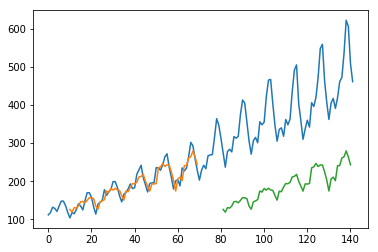

In [229]:
# we-ata lenght we define nan value for preventing missing value matching length of dataset the compare learned data and 
# test data compare to original data
trainpredictplot = numpy.empty_like(dataset)
trainpredictplot[:,:] = numpy.nan
trainpredictplot[time_stepm:len(trainPredict)+time_stepm,:] = trainPredict

testpredictplot = numpy.empty_like(dataset)
testpredictplot[:,:] = numpy.nan
testpredictplot[len(trainPredict)+(2*time_stemp)+1 :len(dataset) -1 :]= testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()